# Crystal Generation

The very first step of ASSYST is the generation of random, periodic crystal structures.

## Imports

In [2]:
from assyst.crystals import Formulas, sample_space_groups
from assyst.plot import concentration_histogram, distance_histogram

## Formulas

The basic unit for structure generation in _ASSYST_ is a formula unit of a given material, such as:

- Mg$_2$Ca
- Mg$_4$Ca$_2$
- and so on

This specifies the number of atoms in a target structure and _ASSYST_ tries to generate as many different space groups of each of these as possible.

### Creation

They can by manually constructed

In [14]:
mg = Formulas(
    ({'Mg': 1}, {'Mg': 2}, {'Mg': 3}, {'Mg': 4})
)

In [15]:
mgca = Formulas( 
    ({'Mg': 2, 'Ca': 1}, {'Mg': 4, 'Ca': 2})
)

or with some helper methods

In [16]:
Formulas.range('Mg', 1, 5)

Formulas(atoms=({'Mg': 1}, {'Mg': 2}, {'Mg': 3}, {'Mg': 4}))

### Operations

In [17]:
Formulas.range('Mg', 1, 5) | Formulas.range('Ca', 1, 3)

Formulas(atoms=({'Mg': 1, 'Ca': 1}, {'Mg': 2, 'Ca': 2}))

In [11]:
Formulas.range('Mg', 1, 5) * Formulas.range('Ca', 1, 3)

Formulas(atoms=({'Mg': 1, 'Ca': 1}, {'Mg': 1, 'Ca': 2}, {'Mg': 2, 'Ca': 1}, {'Mg': 2, 'Ca': 2}, {'Mg': 3, 'Ca': 1}, {'Mg': 3, 'Ca': 2}, {'Mg': 4, 'Ca': 1}, {'Mg': 4, 'Ca': 2}))

In [13]:
Formulas.range('Mg', 1, 5) + Formulas.range('Ca', 1, 3)

Formulas(atoms=({'Mg': 1}, {'Mg': 2}, {'Mg': 3}, {'Mg': 4}, {'Ca': 1}, {'Ca': 2}))

## Sampling

Once the formulas are defined the structures can be generated.

In [19]:
atoms = sample_space_groups(
        formulas = mgca,
)

The sampler returns a generator, the actual structures can be obtained by collecting it in a list.

In [21]:
atoms = list(atoms)

  0%|          | 0/2 [00:00<?, ?it/s]

Spacegroups:   0%|          | 0/230 [00:00<?, ?it/s]

Spacegroups:   0%|          | 0/230 [00:00<?, ?it/s]

### Visualization

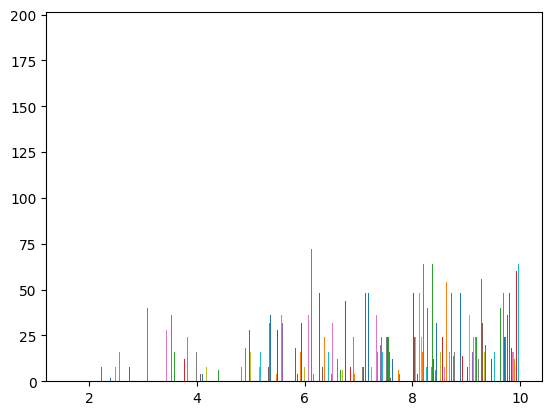

In [33]:
distance_histogram(atoms, rmax=10, reduce=lambda x: x);

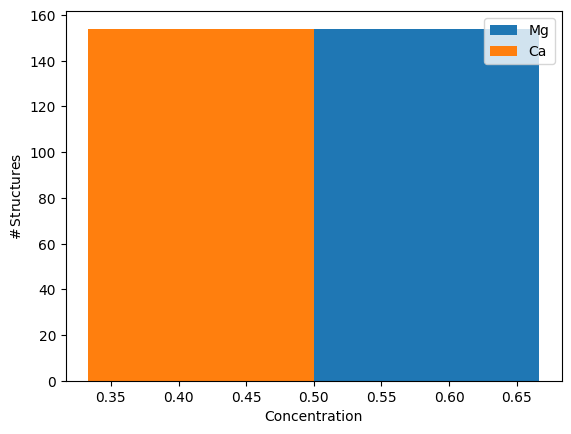

In [24]:
concentration_histogram(atoms)

### Advanced Sampling

The sampling function supports a few more options for advanced sampling.

In [18]:
sample_space_groups?

Signature:
sample_space_groups(
    formulas: Union[assyst.crystals.Formulas, Iterable[dict[str, int]]],
    spacegroups: Union[list[int], tuple[int, ...], Iterable[int], NoneType] = None,
    min_atoms: int = 1,
    max_atoms: int = 10,
    max_structures: int | None = None,
    dim: Literal[0, 1, 2, 3] = 3,
    tolerance: Union[Literal['metallic', 'atomic', 'molecular', 'vdW'], assyst.filters.DistanceFilter, dict] = 'metallic',
) -> Iterator[ase.atoms.Atoms]
Docstring:
Create symmetric random structures.

Args:
    formulas (Formulas or iterable of dicts from str to int): list of chemical formulas
    spacegroups (list of int): which space groups to generate
    max_atoms (int): do not generate structures larger than this
    max_structures (int): generate at most this many structures
    dim (one of 0, 1, 2, or 3): the dimensionality of the structures to generate; if lower than 3 the code generates
        samples no longer from space groups, but from the subperiodic layer, rod, or 